In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'C:\Users\LENOVO\Downloads\Datasets\Fit Bit Easy - Regression.csv')
dataset.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories - Target
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [3]:
dataset.drop(['Id', 'ActivityDate'], axis = 1, inplace = True)
dataset.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories - Target
0,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [4]:
X = dataset.drop(['Calories - Target'], axis = 1)
y = dataset.loc[:, 'Calories - Target']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
pred = lin_reg.predict(X_test)

In [8]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.7372273049044724

In [9]:
dataset.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories - Target
0,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SedentaryMinutes', ylabel='Density'>

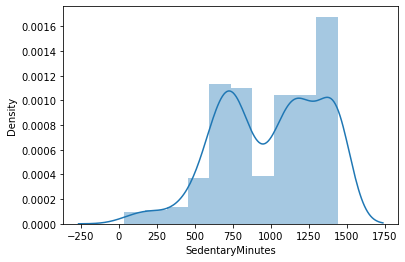

In [10]:
sns.distplot(dataset['SedentaryMinutes'])

<AxesSubplot:ylabel='LoggedActivitiesDistance'>

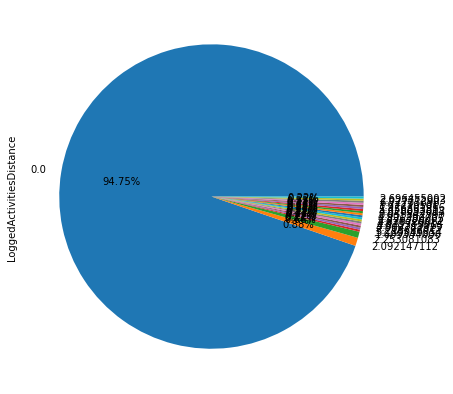

In [15]:
plt.figure(figsize = (7,7))
dataset['LoggedActivitiesDistance'].value_counts().plot.pie(autopct = '%.2f%%')

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SedentaryMinutes', ylabel='count'>

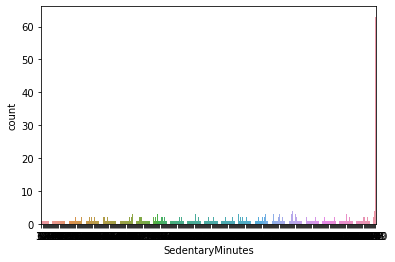

In [16]:
sns.countplot(dataset['SedentaryMinutes'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SedentaryMinutes', ylabel='TotalDistance'>

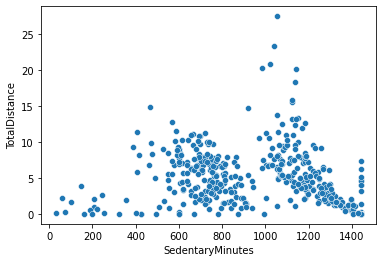

In [17]:
sns.scatterplot(dataset['SedentaryMinutes'], dataset['TotalDistance'])

<AxesSubplot:>

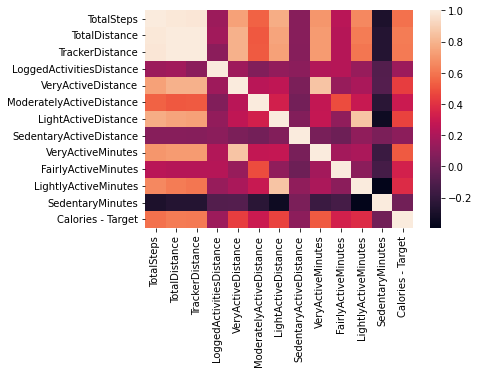

In [18]:
sns.heatmap(dataset.corr())

In [23]:
# sns.barplot(dataset['VeryActiveMinutes'], dataset['SedentaryActiveDistance'], dataset['TrackerDistance'])

In [24]:
dataset.corr()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories - Target
TotalSteps,1.000000,0.986789,0.982997,0.146380,0.733689,0.541838,0.775562,0.081965,0.699699,0.238389,0.654418,-0.285258,0.581380
TotalDistance,0.986789,1.000000,0.995122,0.164312,0.791778,0.515128,0.744812,0.080787,0.714320,0.230712,0.614152,-0.260301,0.613647
TrackerDistance,0.982997,0.995122,1.000000,0.094890,0.789353,0.516099,0.737570,0.077461,0.711804,0.232301,0.598043,-0.258083,0.612066
LoggedActivitiesDistance,0.146380,0.164312,0.094890,1.000000,0.154754,0.060123,0.115671,0.091091,0.218253,0.231675,0.133856,-0.092991,0.148740
VeryActiveDistance,0.733689,0.791778,0.789353,0.154754,1.000000,0.240440,0.264580,0.044666,0.854292,0.129528,0.193593,-0.087726,0.434133
ModeratelyActiveDistance,0.541838,0.515128,0.516099,0.060123,0.240440,1.000000,0.326959,0.016350,0.272720,0.480906,0.291906,-0.236723,0.300781
LightActiveDistance,0.775562,0.744812,0.737570,0.115671,0.264580,0.326959,1.000000,0.069051,0.276649,0.112307,0.857555,-0.343560,0.451239
SedentaryActiveDistance,0.081965,0.080787,0.077461,0.091091,0.044666,0.016350,0.069051,1.000000,0.032322,-0.003361,0.110162,0.042280,0.096874
VeryActiveMinutes,0.699699,0.714320,0.711804,0.218253,0.854292,0.272720,0.276649,0.032322,1.000000,0.167764,0.199697,-0.177652,0.518905
FairlyActiveMinutes,0.238389,0.230712,0.232301,0.231675,0.129528,0.480906,0.112307,-0.003361,0.167764,1.000000,0.095449,-0.142598,0.334550
